In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import mycolorbars


In [9]:
## Scatter plot for showing the correlation btw env factor and wetland CH4 emission.
## Historical

# Get diff of inundated fraction
path = '/data/jain1/c/sshu3/SBGC/results/AGU2019/'
fname = 'diff_rcp45_fw.nc'
nclu_fw=NetCDFFile(path+fname,'r')
fw_m_45 = nclu_fw.variables['fw_m'][:]
fw_45 = np.nanmean(fw_m_45, axis=0)

latnc = nclu_fw.variables['lat'][:]
lonnc = nclu_fw.variables['lon'][:]
#lonnc = ((lonnc - 180) % 360) - 180

nclu_fw.close()

fname = 'diff_rcp85_fw.nc'
nclu_fw=NetCDFFile(path+fname,'r')
fw_m_85 = nclu_fw.variables['fw_m'][:]
fw_85 = np.nanmean(fw_m_85, axis=0)
nclu_fw.close()

# Get Environmental factors (Tair and Precip)
path = '/data/jain1/c/sshu3/SBGC/results/AGU2019/'
fname = 'diff_rcp45_env.nc'
nclu_env=NetCDFFile(path+fname,'r')
ncvar_temp_45 = nclu_env.variables['tavg_avg_yr'][:]
ncvar_prec_45 = nclu_env.variables['precip_avg_yr'][:]
#ncvar_wliq_45 = nclu_env.variables['wliq_vol_1m_yr'][:]
ncvar_wliq_45 = nclu_env.variables['sm_1_5_avg_yr'][:]
nclu_env.close()

path = '/data/jain1/c/sshu3/SBGC/results/AGU2019/'
fname = 'diff_rcp85_env.nc'
nclu_env=NetCDFFile(path+fname,'r')
ncvar_temp_85 = nclu_env.variables['tavg_avg_yr'][:]
ncvar_prec_85 = nclu_env.variables['precip_avg_yr'][:]
#ncvar_wliq = nclu_env.variables['wliq_vol_1m_yr'][:]
ncvar_wliq_85 = nclu_env.variables['sm_1_5_avg_yr'][:]
nclu_env.close()

# Mask out specific regions to get some numbers
ncmk=NetCDFFile('surfdata_05x05_13reg.nc','r')
ncvar_mask = ncmk.variables['REGION_MASK_CRU_NCEP'][:]

In [13]:
np.shape(fw_85)

(360, 720)

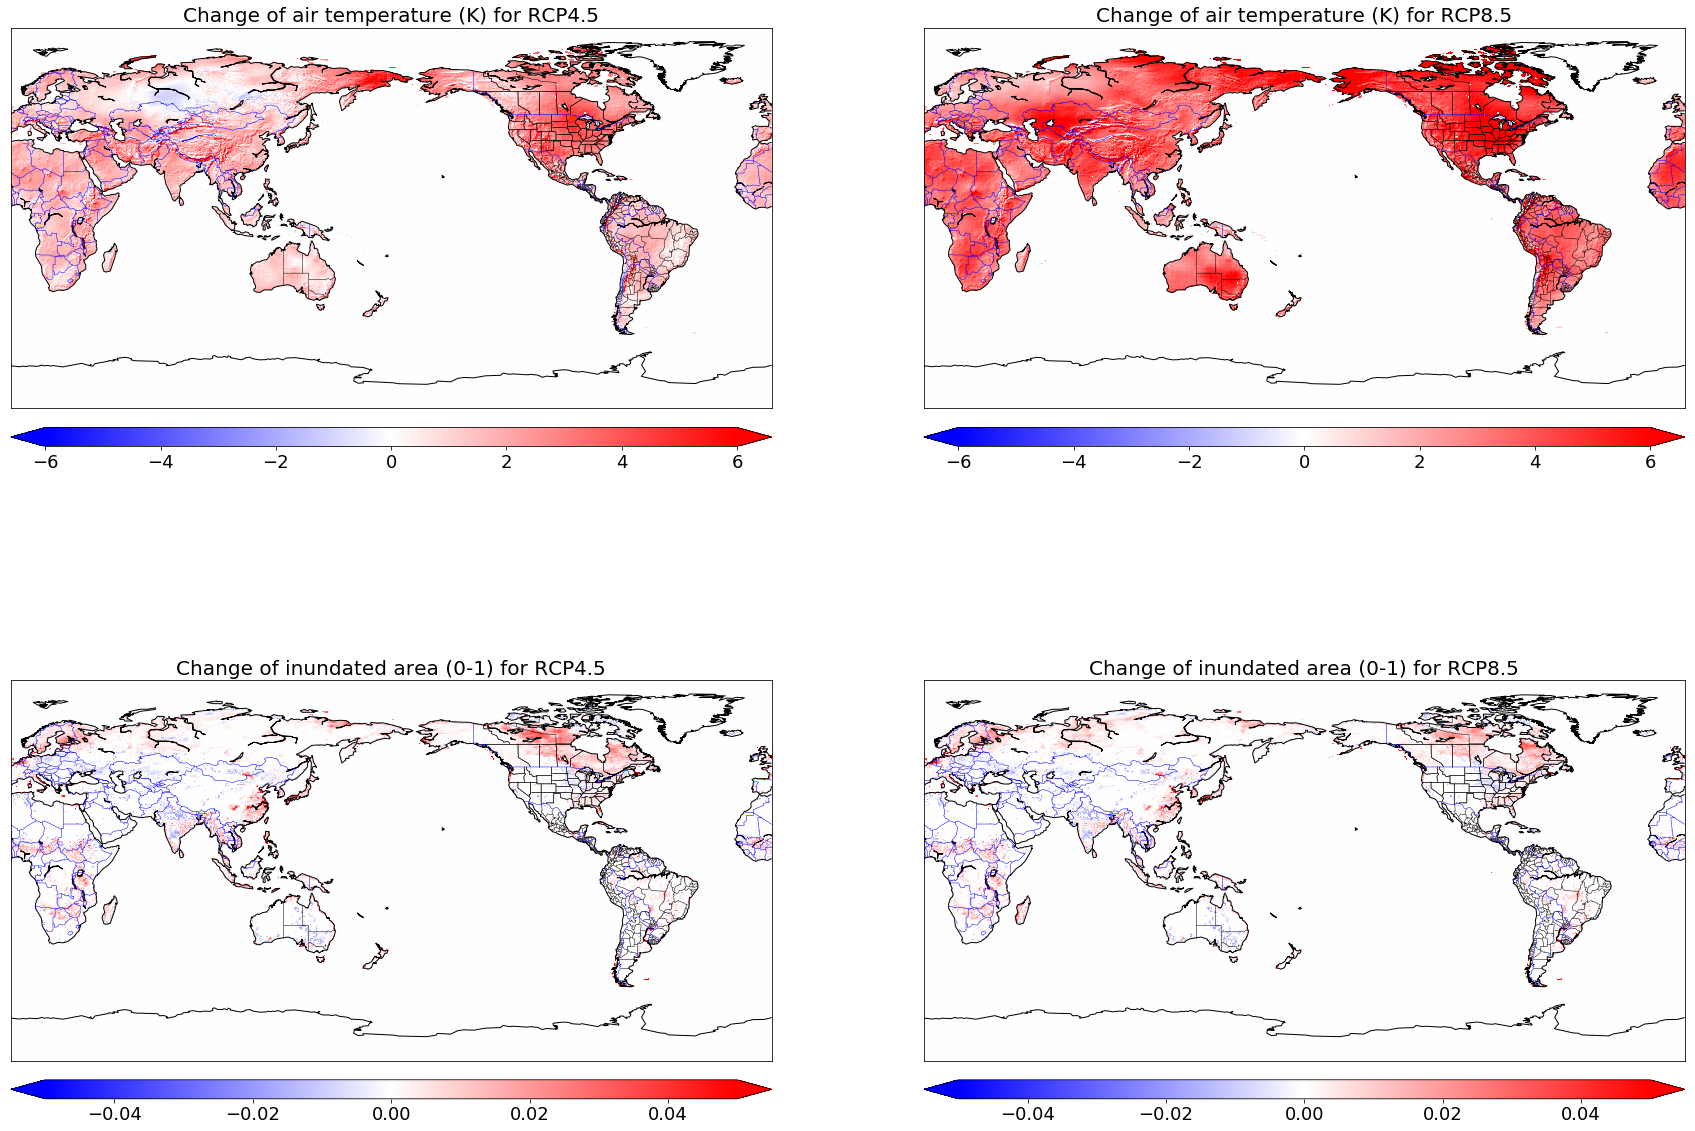

In [23]:
#http://matplotlib.org/basemap/users/mapsetup.html

fig = plt.figure(figsize=(30,22))

ax1 = fig.add_subplot(221)
ax1.set_title("Change of air temperature (K) for RCP4.5",fontsize=20)

map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs1 = map.pcolormesh(x,y,ncvar_temp_45[:,:],
              norm=colors.Normalize(vmin=-6, vmax=6),cmap=plt.cm.bwr) # use log color scale
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
#plt.title('Maize harvested area fraction')
cbar.ax.tick_params(labelsize=18) 


ax2 = fig.add_subplot(222)
ax2.set_title("Change of air temperature (K) for RCP8.5",fontsize=20)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
           llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
clevs = np.arange(0,7,0.5)

cs = map.pcolormesh(x,y,ncvar_temp_85[:,:],
             norm=colors.Normalize(vmin=-6, vmax=6),cmap=plt.cm.bwr) # use log color scale,
                                                     # omit this to use linear
                                                    # color scale
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 


ax1 = fig.add_subplot(223)
ax1.set_title("Change of inundated area (0-1) for RCP4.5",fontsize=20)

map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,lat_ts=20,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

fw_45[fw_45<-0.02] = 0
cs = map.pcolormesh(x,y,fw_45[:,:],
              norm=colors.Normalize(vmin=-0.05, vmax=0.05),cmap=plt.cm.bwr) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 
#cbar = map.colorbar(cs,location='bottom',pad="5%")
#cbar.ax.tick_params(labelsize=18) 


ax1 = fig.add_subplot(224)
ax1.set_title("Change of inundated area (0-1) for RCP8.5",fontsize=20)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
           llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

fw_85[fw_85<-0.02] = 0
cs = map.pcolormesh(x,y,fw_85[:,:],
             norm=colors.Normalize(vmin=-0.05, vmax=0.05),cmap=plt.cm.bwr) # use log color scale,
                                                     # omit this to use linear
                                                    # color scale
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

#plt.show()
plt.savefig('Temp_fw_change.jpg',dpi=300)

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(wetland_diff_85, temp_diff_85, c=fw, vmin=0, vmax=0.4, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
# Prepare scatter plot
selx = wetland_diff_85[ncvar_prec>400]
sely = temp_diff_85[ncvar_prec>400]
selc = ncvar_prec[ncvar_prec>400]
newx = selx[abs(selx)!=0]
newy = sely[abs(selx)!=0]
newc = selc[abs(selx)!=0]
plt.rcParams.update({'font.size': 16})
plt.scatter(selx, sely, c=selc, vmin=0, vmax=700, cmap=plt.cm.Blues)
plt.colorbar()
# plot the data itself

# calc the trendline
# z = np.polyfit(newx, newy, 1)
# p = np.poly1d(z)
plt.plot(newx, p(newx)-0.1, "r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

ybar = np.sum(sely)/len(sely)          # or sum(y)/len(y)
ssreg = np.sum((p(selx)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((sely - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
r_sqrt = ssreg / sstot

plt.xlabel('Change of emission (gCH4 m-2 yr-1)', fontsize=20)
plt.ylabel('Change of air temperature (K)', fontsize=20)
plt.legend(['Trend Line', 'Precipitation'], fontsize=20)

#plt.show()
plt.savefig('fig_rcp85_temp.png')

In [ ]:
fig = plt.figure(figsize=(10,8))
# Prepare scatter plot
selx = wetland_diff_85[ncvar_prec>400]
sely = fw_diff_85[ncvar_prec>400]+0.3
selc = ncvar_prec[ncvar_prec>400]
newx = selx[abs(selx)!=0]
newy = sely[abs(selx)!=0]
newc = selc[abs(selx)!=0]
plt.rcParams.update({'font.size': 16})
plt.scatter(newx, newy, c=newc, vmin=0, vmax=700, cmap=plt.cm.Blues)
plt.colorbar()
# plot the data itself

# calc the trendline
z = np.polyfit(newx, newy, 1)
p = np.poly1d(z)
plt.plot(newx, p(newx)-0.1, "r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

ybar = np.sum(newy)/len(newy)          # or sum(y)/len(y)
ssreg = np.sum((p(newx)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((newy - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
r_sqrt = ssreg / sstot

plt.xlabel('Change of emission (gCH4 m-2 yr-1)', fontsize=20)
plt.ylabel('Change of FW (0-1)', fontsize=20)
plt.legend(['Trend Line', 'Precipitation'], fontsize=20)

#plt.show()
plt.savefig('fig_rcp85_fw.png')

In [ ]:
fig = plt.figure(figsize=(10,8))
# Prepare scatter plot
selx = wetland_diff_45[ncvar_prec>400]
sely = temp_diff_45[ncvar_prec>400]
selc = ncvar_prec[ncvar_prec>400]
newx = selx[abs(selx)!=0]
newy = sely[abs(selx)!=0]
newc = selc[abs(selx)!=0]
plt.rcParams.update({'font.size': 16})
plt.scatter(newx, newy, c=newc, vmin=0, vmax=700, cmap=plt.cm.Blues)
plt.colorbar()
# plot the data itself

# calc the trendline
z = np.polyfit(newx, newy, 1)
p = np.poly1d(z)
plt.plot(newx, p(newx)-0.1, "r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

ybar = np.sum(newy)/len(newy)          # or sum(y)/len(y)
ssreg = np.sum((p(newx)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((newy - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
r_sqrt = ssreg / sstot

plt.xlabel('Change of emission (gCH4 m-2 yr-1)', fontsize=20)
plt.ylabel('Change of air temperature (K)', fontsize=20)
plt.legend(['Trend Line', 'Precipitation'], fontsize=20)

#plt.show()
plt.savefig('fig_rcp45_temp.png')

In [ ]:
fig = plt.figure(figsize=(10,8))
# Prepare scatter plot
selx = wetland_diff_45[ncvar_prec>400]
sely = fw_diff_45[ncvar_prec>400]+0.15
selc = ncvar_prec[ncvar_prec>400]
newx = selx[abs(selx)!=0]
newy = sely[abs(selx)!=0]
newc = selc[abs(selx)!=0]
plt.rcParams.update({'font.size': 16})
plt.scatter(newx, newy, c=newc, vmin=0, vmax=700, cmap=plt.cm.Blues)
plt.colorbar()
# plot the data itself

# calc the trendline
z = np.polyfit(newx, newy, 1)
p = np.poly1d(z)
plt.plot(newx, p(newx)-0.05, "r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

ybar = np.sum(newy)/len(newy)          # or sum(y)/len(y)
ssreg = np.sum((p(newx)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((newy - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
r_sqrt = ssreg / sstot

plt.xlabel('Change of emission (gCH4 m-2 yr-1)', fontsize=20)
plt.ylabel('Change of FW (0-1)', fontsize=20)
plt.legend(['Trend Line', 'Precipitation'], fontsize=20)

#plt.show()
plt.savefig('fig_rcp45_fw.png')

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_wetland, fw, c=ncvar_temp, vmin=250, vmax=280, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
#plt.savefig('figs5a.png')

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar_nonwtld[ncvar_nonwtld<1.0], ncvar_wliq[ncvar_nonwtld<1.0]*100, c=ncvar_temp[ncvar_nonwtld<1.0], vmin=250, vmax=280, cmap=plt.cm.Reds)
plt.xlim([-3,3])
plt.axvline(x=0.0)
plt.colorbar()
#plt.show()
plt.savefig('nonwetlandch4_vs_sm_ctemp.jpg')

In [ ]:
# The following cells are for analyzing the RCP4.5 projection.
diff_wetland = ncvar2_wetland - ncvar_wetland
diff_nonwtld = ncvar2_nonwtld - ncvar_nonwtld
diff_wetland_prod = ncvar2_wetland_prod - ncvar_wetland_prod
diff_fw = fw2 - fw
diff_temp = ncvar2_temp - ncvar_temp
diff_prec = ncvar2_prec - ncvar_prec
diff_wliq = ncvar2_wliq - ncvar_wliq

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_fw, c=diff_temp, vmin=1, vmax=2.5, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland[abs(ncvar2_wetland)>0.3], diff_temp[abs(ncvar2_wetland)>0.3])  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_prec)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_nonwtld, diff_wliq)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# The following cells are for analyzing the RCP8.5 projection.
diff_wetland = ncvar3_wetland - ncvar_wetland
diff_nonwtld = ncvar3_nonwtld - ncvar_nonwtld
diff_wetland_prod = ncvar3_wetland_prod - ncvar_wetland_prod
diff_fw = fw3 - fw
diff_temp = ncvar3_temp - ncvar_temp
diff_prec = ncvar3_prec - ncvar_prec
diff_wliq = ncvar3_wliq - ncvar_wliq

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_fw, c=diff_temp, vmin=3, vmax=6, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_wetland_prod)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_wetland, diff_prec)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(diff_nonwtld, diff_wliq)  #, c=diff_temp, vmin=-0.1, vmax=0.1, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()

In [ ]:
# Prepare scatter plot
plt.rcParams.update({'font.size': 16})
plt.scatter(ncvar3_nonwtld, ncvar3_wliq, c=ncvar3_temp, vmin=260, vmax=300, cmap=plt.cm.Reds)
#plt.colorbar()
plt.show()